# Data exploration
The evaluation strategy is: <br>
Train = everything until 01/06/2022 (excluded)<br>
Test = from 01/06/2022 until 01/09/2022<br>
The metric to use is balanced accuracy<br>


In [154]:
# Import libraries
import pandas as pd
import matplotlib as mp

In [155]:
# Read data
df_ticker_data = pd.read_csv('C:/Users/karen/PycharmProjects/ycng228-project/.data/_SP500_data_all.csv',index_col = 0)
df_ticker_data.index.name = 'Date'

df_ticker_info = pd.read_csv('C:/Users/karen/PycharmProjects/ycng228-project/.data/_SP500_ticker_info.csv')

In [156]:
display(df_ticker_info)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [157]:
# Industry Sectors
print(df_ticker_info['GICS Sector'].nunique())
print(df_ticker_info['GICS Sector'].unique())

11
['Industrials' 'Health Care' 'Information Technology'
 'Communication Services' 'Consumer Staples' 'Consumer Discretionary'
 'Utilities' 'Financials' 'Materials' 'Real Estate' 'Energy']


In [5]:
# Industry Sub-Sectors
print(df_ticker_info['GICS Sub-Industry'].nunique())
print(df_ticker_info['GICS Sub-Industry'].unique())

122
['Industrial Conglomerates' 'Building Products' 'Health Care Equipment'
 'Pharmaceuticals' 'IT Consulting & Other Services'
 'Interactive Home Entertainment' 'Agricultural Products'
 'Application Software' 'Data Processing & Outsourced Services'
 'Automotive Retail' 'Independent Power Producers & Energy Traders'
 'Life & Health Insurance' 'Industrial Gases'
 'Internet Services & Infrastructure' 'Airlines' 'Specialty Chemicals'
 'Office REITs' 'Health Care Supplies' 'Electric Utilities'
 'Property & Casualty Insurance' 'Interactive Media & Services' 'Tobacco'
 'Internet & Direct Marketing Retail' 'Paper Packaging' 'Semiconductors'
 'Multi-Utilities' 'Consumer Finance' 'Specialized REITs'
 'Water Utilities' 'Asset Management & Custody Banks'
 'Health Care Distributors' 'Electrical Components & Equipment'
 'Biotechnology' 'Electronic Components' 'Insurance Brokers'
 'Oil & Gas Exploration & Production'
 'Technology Hardware, Storage & Peripherals' 'Semiconductor Equipment'
 'Auto Part

In [6]:
display(df_ticker_data.sort_index(axis = 0))

,open,high,low,close,adjclose,volume,ticker
Date,,,,,,,
1970-03-25,12.153250,12.434250,12.153250,12.364000,0.467821,60498,CNP
1970-03-25,1.062500,1.100694,1.062500,1.086806,0.352700,2275200,JNJ
1970-03-25,6.375000,6.554688,6.375000,6.476563,1.319017,436800,MMM
1970-03-25,6.781250,6.937500,6.781250,6.875000,0.261931,68400,ED
1970-03-25,1.753906,1.796875,1.753906,1.789063,0.158143,2720000,XOM
...,...,...,...,...,...,...,...
2022-09-30,27.750000,27.809999,27.690001,27.719999,27.719999,6244100,NLSN
2022-09-30,77.610001,77.959999,75.129997,75.209999,75.209999,1892100,SWK
2022-09-30,215.860001,217.320007,212.029999,214.699997,214.699997,2501700,AMT


In [7]:
# Transform Data

df = df_ticker_data[['close','ticker']].rename(columns = {"close" : "Closing Price","ticker" : "Ticker"})
df = df.pivot(columns = "Ticker")

In [8]:
display(df)

Closing Price                                             \
Ticker                 A    AAL         AAP        AAPL        ABBV   
Date                                                                  
1970-03-25           NaN    NaN         NaN         NaN         NaN   
1970-03-26           NaN    NaN         NaN         NaN         NaN   
1970-03-30           NaN    NaN         NaN         NaN         NaN   
1970-03-31           NaN    NaN         NaN         NaN         NaN   
1970-04-01           NaN    NaN         NaN         NaN         NaN   
...                  ...    ...         ...         ...         ...   
2022-09-26    122.309998  11.86  157.679993  150.770004  141.210007   
2022-09-27    121.610001  12.27  159.309998  151.759995  141.720001   
2022-09-28    123.720001  12.75  163.320007  149.839996  144.600006   
2022-09-29    122.739998  12.25  159.660004  142.479996  142.720001   
2022-09-30    121.550003  12.04  156.339996  138.199997  134.210007   

                                                                       ...  \
Ticker             ABC        ABMD        ABT         ACN        ADBE  ...   
Date                                                                   ...   
1970-03-25         NaN         NaN        NaN         NaN         NaN  ...   
1970-03-26         NaN         NaN        NaN         NaN         NaN  ...   
1970-03-30         NaN         NaN        NaN         NaN         NaN  ...   
1970-03-31         NaN         NaN        NaN         NaN         NaN  ...   
1970-04-01         NaN         NaN        NaN         NaN         NaN  ...   
...                ...         ...        ...         ...         ...  ...   
2022-09-26  136.350006  242.490005  99.839996  257.540009  276.959991  ...   
2022-09-27  135.440002  244.399994  98.330002  256.339996  277.570007  ...   
2022-09-28  138.410004  250.050003  98.720001  261.929993  281.399994  ...   
2022-09-29  136.070007  248.960007  98.290001  258.269989  278.250000  ...   
2022-09-30  135.330002  245.660004  96.760002  257.299988  275.200012  ...   

                                                                               \
Ticker           WYNN        XEL        XOM       XRAY        XYL         YUM   
Date                                                                            
1970-03-25        NaN        NaN   1.789063        NaN        NaN         NaN   
1970-03-26        NaN        NaN   1.792969        NaN        NaN         NaN   
1970-03-30        NaN        NaN   1.804688        NaN        NaN         NaN   
1970-03-31        NaN        NaN   1.789063        NaN        NaN         NaN   
1970-04-01        NaN        NaN   1.796875        NaN        NaN         NaN   
...               ...        ...        ...        ...        ...         ...   
2022-09-26  66.800003  69.949997  83.980003  29.690001  88.889999  109.160004   
2022-09-27  66.559998  68.370003  85.739998  29.350000  88.360001  107.769997   
2022-09-28  66.760002  68.910004  88.860001  29.780001  90.570000  108.120003   
2022-09-29  64.349998  65.360001  88.680000  29.150000  88.089996  107.209999   
2022-09-30  63.029999  64.000000  87.309998  28.350000  87.360001  106.339996   

                                                           
Ticker             ZBH        ZBRA       ZION         ZTS  
Date                                                       
1970-03-25         NaN         NaN        NaN         NaN  
1970-03-26         NaN         NaN        NaN         NaN  
1970-03-30         NaN         NaN        NaN         NaN  
1970-03-31         NaN         NaN        NaN         NaN  
1970-04-01         NaN         NaN        NaN         NaN  
...                ...         ...        ...         ...  
2022-09-26  105.150002  265.859985  53.529999  148.600006  
2022-09-27  104.820000  264.950012  52.759998  149.399994  
2022-09-28  107.529999  271.350006  53.270000  152.259995  
2022-09-29  107.120003  265.519989  51.779999  150.949997  
2022-09-

In [72]:
# Count number of NaaN per date
df_nulls = pd.DataFrame(df.isnull().sum(axis = 1))
df_nulls.rename(columns = {df_nulls.columns[0] : "Number of Nulls"}, inplace = True)
df_nulls.index = pd.to_datetime(df_nulls.index)
# display(df_nulls)

<AxesSubplot:title={'center':'Number of Null Data points per year'}, xlabel='Date'>

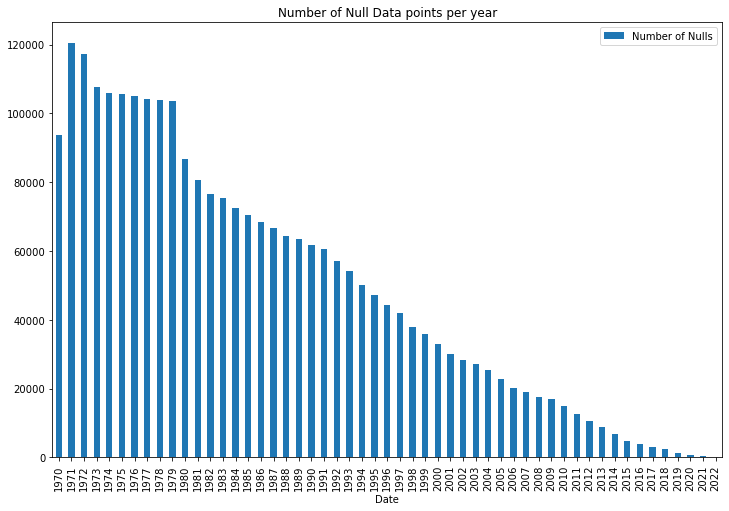

In [71]:
# Visualize
df_nulls_per_year = df_nulls.groupby(df_nulls.index.year).sum()
df_nulls_per_year.plot(kind = 'bar', figsize = (12,8), title = 'Number of Null Data points per year')

In [82]:
df_stats = df.describe()
display(df_stats)

Closing Price                                                       \
Ticker             A          AAL          AAP          AAPL         ABBV   
count    5754.000000  4283.000000  5246.000000  10540.000000  2455.000000   
mean       44.133879    25.550215    90.735226     15.720654    80.673483   
std        34.502171    15.946238    61.110863     33.859730    28.810948   
min         7.761087     1.760000    12.526667      0.049107    33.709999   
25%        22.054721    10.815000    37.122499      0.285357    59.279999   
50%        30.418455    22.450001    70.930000      0.481027    72.639999   
75%        55.398054    39.674999   149.944996     15.430267    97.084999   
max       179.279999    62.950001   241.910004    182.009995   174.960007   

                                                                          ...  \
Ticker          ABC         ABMD           ABT          ACN         ADBE  ...   
count   6923.000000  8866.000000  10728.000000  5335.000000  9108.000000  ...   
mean      43.791499    56.132089     25.273062    93.765747    73.643878  ...   
std       39.329565    98.689491     28.664577    85.638878   131.740721  ...   
min        2.500000     2.125000      0.487478    11.850000     0.207031  ...   
25%       13.785000     5.875000      4.713459    30.200001     4.343750  ...   
50%       23.250000    10.875000     19.480054    58.810001    25.860000  ...   
75%       80.860001    26.025001     28.260220   125.010002    48.307499  ...   
max      165.729996   449.750000    141.460007   415.420013   688.369995  ...   

                                                                           \
Ticker         WYNN           XEL           XOM         XRAY          XYL   
count   5018.000000  12514.000000  13249.000000  8856.000000  2760.000000   
mean      98.104888     22.713825     35.405024    26.155620    59.052525   
std       45.906265     15.869915     32.237609    19.906582    28.720375   
min       11.090000      3.875000      1.601563     0.458333    23.000000   
25%       66.254999     10.718750      4.625000     7.208333    35.027499   
50%       97.849998     20.188750     20.968750    26.260000    51.805000   
75%      126.287500     26.950001     67.849998    41.432500    78.642500   
max      247.949997     77.410004    104.589996    69.120003   138.029999   

                                                                          
Ticker          YUM          ZBH         ZBRA          ZION          ZTS  
count   6302.000000  5331.000000  7842.000000  10728.000000  2434.000000  
mean      42.892771    84.063484    74.239716     29.287730    91.247120  
std       35.312303    33.069814   112.607160     23.554768    56.912803  
min        4.268512    24.291262     3.277778      1.604167    28.400000  
25%       12.404744    58.975729    16.888889      5.656250    44.872499  
50%       28.767075    77.339806    35.000000     24.835000    71.375000  
75%       63.188961   112.024273    68.127501     49.854999   137.087505  
max      138.860001   173.407761   614.549988     88.279999   247.029999  

[8 rows x 502 columns]

In [98]:
# Validate Describe matrix for zero values
(df_stats == 0).astype(int).sum(axis=1)

count    0
mean     0
std      0
min      0
25%      0
50%      0
75%      0
max      0
dtype: int64

In [104]:
print(df_stats.loc['count'].nsmallest(10))

               Ticker
Closing Price  CEG        177.0
               OGN        349.0
               CARR       640.0
               OTIS       640.0
               CTVA       846.0
               DOW        892.0
               FOX        897.0
               FOXA       898.0
               MRNA       961.0
               CDAY      1117.0
Name: count, dtype: float64


In [95]:
print(df_stats.loc['std'].nsmallest(25))

               Ticker
Closing Price  AMCR      1.267252
               HPE       2.582432
               OGN       2.942812
               NWS       3.479308
               NWSA      3.775536
               FOX       4.279542
               VICI      4.635391
               FOXA      4.930497
               HWM       6.291495
               HST       6.369880
               SYF       6.775044
               CNP       6.906077
               INVH      6.927051
               HBAN      7.006543
               F         7.069768
               NI        7.542091
               CSX       8.340033
               MRO       8.598883
               CFG       8.632559
               GM        8.727627
               HPQ       8.763928
               T         8.802865
               IVZ       8.888087
               KMI       8.926052
               FTV       9.010816
Name: std, dtype: float64


In [103]:
print(df_stats.loc['std'].nlargest(10))

               Ticker
Closing Price  NVR       1289.646364
               BKNG       791.019752
               AIG        512.184147
               AZO        471.802883
               CMG        454.693638
               MTD        374.228647
               EQIX       231.232190
               BLK        216.010204
               CHTR       203.569896
               REGN       200.196420
Name: std, dtype: float64


In [94]:
print(df_stats.loc['min'].nsmallest(25))

               Ticker
Closing Price  MNST      0.013021
               WMT       0.015625
               HD        0.029995
               ORCL      0.041667
               BEN       0.043210
               PGR       0.046639
               AAPL      0.049107
               DHR       0.050346
               FAST      0.054036
               WRB       0.058528
               SYY       0.059896
               JKHY      0.062500
               AMZN      0.069792
               CSCO      0.071181
               AMGN      0.075521
               AMAT      0.076389
               HAS       0.079012
               CMCSA     0.082372
               SYK       0.084105
               UNH       0.085938
               AFL       0.088384
               MSFT      0.090278
               RHI       0.092014
               NKE       0.107422
               BRO       0.111111
Name: min, dtype: float64


In [105]:
print(df_stats.loc['max'].nlargest(10))

               Ticker
Closing Price  NVR       5959.330078
               BKNG      2703.260010
               AZO       2332.090088
               AIG       2073.750000
               CMG       1944.050049
               MTD       1702.530029
               BLK        971.489990
               EQIX       882.830017
               BIO        825.770020
               CHTR       821.010010
Name: max, dtype: float64


In [110]:
# display(df)
df_delta = df.diff()
display(df_delta)

Closing Price                                                    \
Ticker                 A       AAL       AAP      AAPL      ABBV       ABC   
Date                                                                         
1970-03-25           NaN       NaN       NaN       NaN       NaN       NaN   
1970-03-26           NaN       NaN       NaN       NaN       NaN       NaN   
1970-03-30           NaN       NaN       NaN       NaN       NaN       NaN   
1970-03-31           NaN       NaN       NaN       NaN       NaN       NaN   
1970-04-01           NaN       NaN       NaN       NaN       NaN       NaN   
...                  ...       ...       ...       ...       ...       ...   
2022-09-26     -1.170006 -0.350000 -2.820007  0.340012 -1.849991 -0.849991   
2022-09-27     -0.699997  0.410001  1.630005  0.989990  0.509995 -0.910004   
2022-09-28      2.110001  0.480000  4.010010 -1.919998  2.880005  2.970001   
2022-09-29     -0.980003 -0.500000 -3.660004 -7.360001 -1.880005 -2.339996   
2022-09-30     -1.189995 -0.210000 -3.320007 -4.279999 -8.509995 -0.740005   

                                                    ...                      \
Ticker          ABMD       ABT       ACN      ADBE  ...      WYNN       XEL   
Date                                                ...                       
1970-03-25       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1970-03-26       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1970-03-30       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1970-03-31       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1970-04-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2022-09-26 -3.039993 -0.840004 -2.440002 -7.600006  ...  7.150002 -1.610001   
2022-09-27  1.909988 -1.509995 -1.200012  0.610016  ... -0.240005 -1.579994   
2022-09-28  5.650009  0.389999  5.589996  3.829987  ...  0.200005  0.540001   
2022-09-29 -1.089996 -0.430000 -3.660004 -3.149994  ... -2.410004 -3.550003   
2022-09-30 -3.300003 -1.529999 -0.970001 -3.049988  ... -1.320000 -1.360001   

                                                                        \
Ticker           XOM      XRAY       XYL       YUM       ZBH      ZBRA   
Date                                                                     
1970-03-25       NaN       NaN       NaN       NaN       NaN       NaN   
1970-03-26  0.003906       NaN       NaN       NaN       NaN       NaN   
1970-03-30  0.011719       NaN       NaN       NaN       NaN       NaN   
1970-03-31 -0.015625       NaN       NaN       NaN       NaN       NaN   
1970-04-01  0.007812       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2022-09-26 -1.769997 -0.289999 -0.970001 -1.489998 -1.059998 -2.180023   
2022-09-27  1.759995 -0.340000 -0.529999 -1.390007 -0.330002 -0.909973   
2022-09-28  3.120003  0.430000  2.209999  0.350006  2.709999  6.399994   
2022-09-29 -0.180000 -0.630001 -2.480003 -0.910004 -0.409996 -5.830017   
2022-09-30 -1.370003 -0.799999 -0.729996 -0.870003 -2.570000 -3.509979   

                                
Ticker          ZION       ZTS  
Date                            
1970-03-25       NaN       NaN  
1970-03-26       NaN       NaN  
1970-03-30       NaN       NaN  
1970-03-31       NaN       NaN  
1970-04-01       NaN       NaN  
...              ...       ...  
2022-09-26 -0.990002 -1.449997  
2022-09-27 -0.770000  0.799988  
2022-09-28  0.510002  2.860001  
2022-09-29 -1.490002 -1.309998  
2022-09-30 -0.919998 -2.660004  

[13249 rows x 502 columns]

In [114]:
(df_delta < 0).sum().sum()

1857954

In [115]:
(df_delta > 0).sum().sum()

1947430

In [131]:
df_bal = pd.DataFrame([(df_delta < 0).sum(),(df_delta > 0).sum()])
display(df_bal)

Closing Price                                                        \
Ticker             A   AAL   AAP  AAPL  ABBV   ABC  ABMD   ABT   ACN  ADBE   
0               2744  2133  2540  4942  1120  3250  4071  5015  2503  4308   
1               2964  2114  2676  5222  1318  3525  4044  5282  2785  4538   

        ...                                                              
Ticker  ...  WYNN   XEL   XOM  XRAY   XYL   YUM   ZBH  ZBRA  ZION   ZTS  
0       ...  2533  5320  6148  3937  1322  3005  2587  3728  4498  1135  
1       ...  2460  5810  6446  4207  1417  3239  2720  3812  4808  1276  

[2 rows x 502 columns]

In [153]:
print('Mean of differences between price increase and price decrease across tickers: ' + str(round(df_bal.diff().loc[1].mean(),2))) #positive minus negative
print('Standard deviation of differences between price increase and price decrease across tickers: ' + str(round(df_bal.diff().loc[1].std(),2)))
print('Median of differences between price increase and price decrease across tickers: ' + str(round(df_bal.diff().loc[1].median(),2)))
print('Individual ticker datasets seem to be slightly unbalanced towards price increase')

Mean of differences between price increase and price decrease across tickers: 178.24
Standard deviation of differences between price increase and price decrease across tickers: 127.9
Median of differences between price increase and price decrease across tickers: 180.5
Individual ticker datasets seem to be slightly unbalanced towards price increase


In [139]:
display(df_bal.diff().loc[1].median())

180.5

In [149]:
print('Standard deviation of differences between price increase and price decrease across tickers: ' + str(round(df_bal.diff().loc[1].std(),2)))

Standard deviation of differences between price increase and price decrease across tickers: 127.9


# To do:
### Clean up
DONE - 1. Validate min date where all indexes are present (not all should start at 1970) <br>
2. Validate number of tickers per date <br>
REJECTED - 3. Validate missing lines per ticker (after min date) <br>
DONE - 4. Validate NaaN for all tickers / dates <br>
DONE - 5. Validate zero values <br>
 <br>
### Data Exploration
DONE - 6. MAX/MIN <br>
DONE - 7. Average / Variance, Global vs per Ticker? <br>
8. OUTLIERS <br>
9. covariance between closing price and Global average closing price per date  <br>
10. Calculate Delta between Closing Price D and Closing Price D+1 <br>
11. ANALYZE DELTA DISTRIBUTION (down/up) BALANCED OR UNBALANCED DATASET ??? GLOBAL AND PER TICKER <br>


99. Yahoo_finance lists industry sectors. this may be an interesting feature (get industry trend for a month for example). This would be additional data.


# Notes

- Industry sectors or Industry sub-sectors may make a good additional feature down the road
- Using industry average for example may make a good feature
- Finding correlation between industries may be relevant but would be beyond the scope of the course as it would complicate the model too much
- Discuss features further in assignment 4??
- DELTA NEEDS TO BE ANALYZED
- % price increase Appropriate? 
- Use Volume in original data? create feature of DELTA ratio over Volume Ratio? or PRICE/VOLUME
- Use logs to smoothout price changes?

# Results

blablabla